In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')

In [43]:
# Download NLTK stopwords and handle potential download issues
try:
    nltk.download('stopwords', quiet=True)
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
except Exception as e:
    print(f"Error downloading NLTK stopwords: {e}")
    print("Please ensure NLTK is installed and internet is available.")
    stop_words = set(['the', 'is', 'and', 'to', 'in', 'a', 'of'])  # Fallback list

In [45]:
# load data set 
df = pd.read_csv('spam.csv', encoding = 'latin-1')

In [47]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [49]:
# If using UCI SMS Spam Collection, rename columns
df = df[['v1', 'v2']].rename(columns={'v1': 'label', 'v2': 'text'})

In [51]:
# Basic information 
print("Dataset Info:")
print(df.info())

print("\nFirst 5 Rows:")
print(df.head())

print("\nshape:", df.shape)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None

First 5 Rows:
  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

shape: (5572, 2)



Class Distribution:
label
ham     4825
spam     747
Name: count, dtype: int64


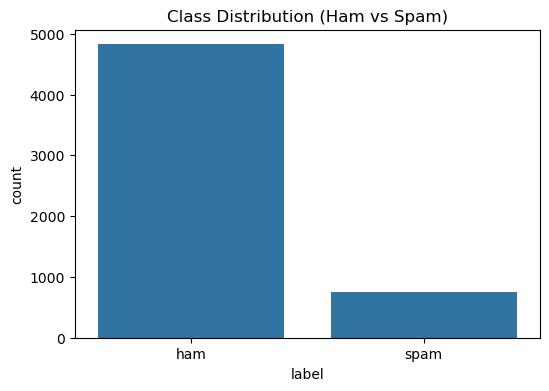

In [53]:
# 2. Class Distribution
print("\nClass Distribution:")
print(df['label'].value_counts())
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df)
plt.title('Class Distribution (Ham vs Spam)')
plt.show()

In [55]:
# Missing Values
print("\nMissing Value:")
print(df.isnull().sum())


Missing Value:
label    0
text     0
dtype: int64



Text Length Statistics:
        count        mean        std   min    25%    50%    75%    max
label                                                                 
ham    4825.0   71.023627  58.016023   2.0   33.0   52.0   92.0  910.0
spam    747.0  138.866131  29.183082  13.0  132.5  149.0  157.0  224.0


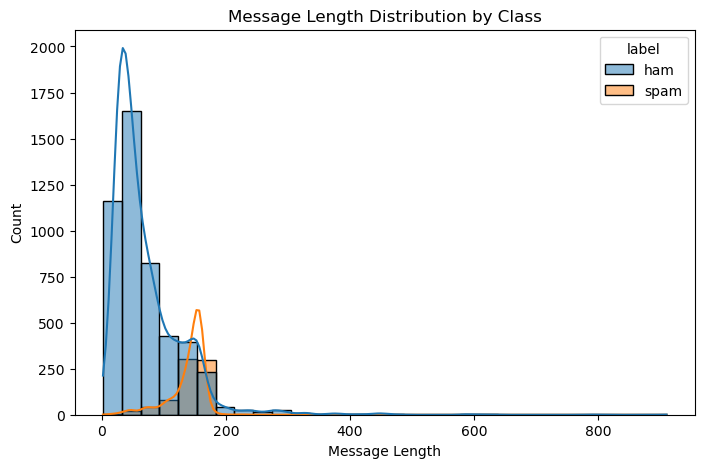

In [57]:
# 4. Message Length Analysis
df['text_length'] = df['text'].apply(len)
print("\nText Length Statistics:")
print(df.groupby('label')['text_length'].describe())


plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='text_length', hue='label', bins=30, kde=True)
plt.title('Message Length Distribution by Class')
plt.xlabel('Message Length')
plt.show()

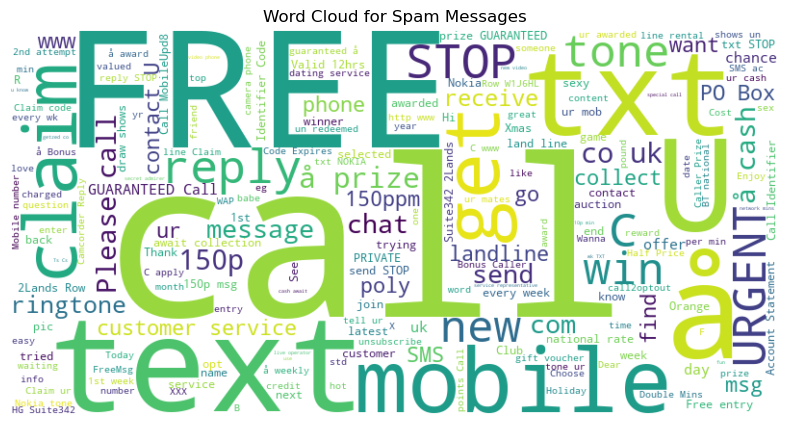

In [61]:
# Spam Word Cloud
plt.figure(figsize=(10, 5))
wordcloud_spam = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(spam_text)
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Messages')
plt.show()

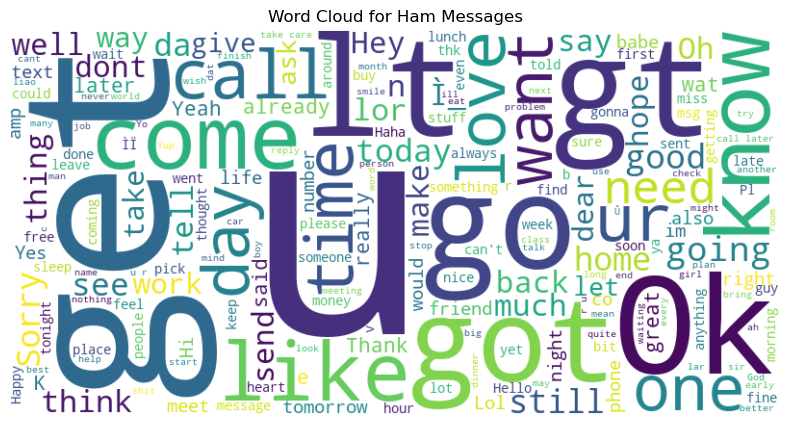

In [63]:
# Ham Word Cloud
plt.figure(figsize=(10, 5))
wordcloud_ham = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(ham_text)
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Ham Messages')
plt.show()

In [65]:
# 6. Most Common Words
def get_common_words(text, label, n=10):
    words = ' '.join(text).lower().split()
    words = [word for word in words if word not in stop_words and word.isalpha()]
    return Counter(words).most_common(n)

print("\nTop 10 Words in Spam Messages:")
print(get_common_words(df[df['label'] == 'spam']['text'], 'spam'))
print("\nTop 10 Words in Ham Messages:")
print(get_common_words(df[df['label'] == 'ham']['text'], 'ham'))


Top 10 Words in Spam Messages:
[('call', 342), ('free', 180), ('ur', 144), ('txt', 136), ('u', 117), ('text', 112), ('mobile', 109), ('claim', 106), ('reply', 101), ('stop', 89)]

Top 10 Words in Ham Messages:
[('u', 874), ('get', 293), ('go', 235), ('ur', 235), ('got', 227), ('like', 221), ('call', 215), ('come', 215), ('know', 208), ('good', 187)]
